# AI Agents for Neuroscience Research  
### Automating Brain Imaging Analysis & Symptom Interpretation  

## Overview  

This notebook demonstrates how to develop **AI-powered agents** that assist neuroscience researchers with common tasks. Using **large language models (LLMs)** and **structured AI workflows**, we will build two specialized agents:  

1. **Brain Imaging Analyst** – Automatically analyzes functional brain imaging (fMRI) data.  
2. **Clinical Neurologist** – Interprets neurological symptoms to provide clinical insights.  

These agents showcase how AI can **automate routine neuroscience research tasks**, improving efficiency and supporting scientific discoveries.  

## Environment Setup and Installation  

This notebook requires specific dependencies, which are listed in `requirements.txt`. 

In [ ]:
# Uncomment the line below to install dependencies in the notebook environment
# !python.exe -m pip install --upgrade pip
# !pip install -r requirements.txt --quiet

## API Key Setup & Loading Environment Variables  

This notebook requires API keys for **LLM-based neuroscience agents**.  
We will:  
1. Load API keys from a `.env` file (if available).  
2. Check if required API keys (**OpenAI, Anthropic**) are set in the environment.  
3. Mask the keys for security before displaying their status.  

If an API key is missing, ensure it is stored in your **`.env` file** or manually set as an environment variable.

In [2]:
import os
from dotenv import load_dotenv

# Load environment variables from .env file FIRST
load_dotenv()

def get_masked_key(env_var, mask_length=16):
    """Retrieve and mask API keys with uniform length."""
    value = os.getenv(env_var, None)
    
    if not value:
        return "MISSING"
    
    visible_chars = 4  # Show first and last 2 characters for all keys
    masked_section = "*" * (mask_length - (2 * visible_chars))  # Standardized mask
    
    # Format the key with uniform length masking
    return f"{value[:2]}{masked_section}{value[-2:]}"

# Check API keys AFTER loading the .env file
api_keys = ["OPENAI_API_KEY", "ANTHROPIC_API_KEY"]

for key in api_keys:
    print(f"{key}: {get_masked_key(key)}")

# Final check
print("\nAPI Key Status:")
for key in api_keys:
    print(f"- {key} found: {'✅' if os.getenv(key) else '❌ MISSING'}")


OPENAI_API_KEY: sk********YA
ANTHROPIC_API_KEY: sk********AA

API Key Status:
- OPENAI_API_KEY found: ✅
- ANTHROPIC_API_KEY found: ✅


In [3]:
# Uncomment to clean up API keys in environment variables.

# import os
# if os.environ["ANTHROPIC_API_KEY"]:
#     del os.environ["ANTHROPIC_API_KEY"]
# if os.environ["OPENAI_API_KEY"]:
#     del os.environ["OPENAI_API_KEY"]

## Sample Data Generator

Creating simple sample data for our agents to work with.

In [4]:
def generate_sample_brain_scan_data():
    """Generate sample brain scan data"""
    brain_scan = {
        "study_info": {
            "type": "fMRI",
            "date": "2023-09-15",
            "subject_id": "SUB123",
            "task": "Working memory task"
        },
        "findings": {
            "prefrontal_cortex": "Increased BOLD signal during task engagement",
            "hippocampus": "Moderate activation in bilateral hippocampi",
            "parietal_lobe": "Strong task-related activation in posterior parietal regions",
            "visual_cortex": "Expected activation pattern during stimulus presentation"
        },
        "behavioral_metrics": {
            "accuracy": 87.5,
            "reaction_time_ms": 428,
            "missed_trials": 3
        }
    }
    return brain_scan

def generate_sample_patient_symptoms():
    """Generate sample neurological symptom data"""
    symptoms = {
        "patient_info": {
            "age": 42,
            "sex": "Male",
            "history": "No significant neurological history"
        },
        "reported_symptoms": [
            "Intermittent headaches (3 months, gradually increasing)",
            "Sensitivity to bright light",
            "Occasional numbness in right hand",
            "Recent episodes of short-term memory issues"
        ],
        "neurological_exam": {
            "cranial_nerves": "Intact",
            "motor": "5/5 strength in all extremities",
            "sensory": "Slight decreased sensation in right fingertips",
            "reflexes": "2+ and symmetric",
            "coordination": "Normal finger-to-nose testing"
        }
    }
    return symptoms

# Generate sample data
brain_scan_data = generate_sample_brain_scan_data()
patient_symptoms = generate_sample_patient_symptoms()

# Display sample data
print("Sample data generated.")

Sample data generated.


## AI-Powered Neuroscience Analysis Tools  

To process our generated neuroscience data, we define two **AI-powered tools**:  

1. **Brain Imaging Analyzer** → Uses LLMs to interpret fMRI findings.  
2. **Neurological Symptom Interpreter** → Uses LLMs to analyze clinical symptoms and suggest possible conditions.  

These tools simulate how AI can assist researchers and clinicians in understanding **brain activity and neurological disorders**.

In [6]:
import json

def analyze_brain_imaging(scan_data_json):
    """
    AI-powered tool for analyzing fMRI brain imaging data.

    Given a JSON object containing brain scan findings, this function:
    - Identifies key findings in different brain regions.
    - Correlates neural activity with behavioral performance.
    - Provides interpretations of activation patterns in a cognitive task.
    - Suggests possible follow-up analyses.

    Returns a structured AI-generated research report.
    """
    try:
        # Convert JSON string to dict if needed
        scan_data = json.loads(scan_data_json) if isinstance(scan_data_json, str) else scan_data_json
        
        # Prepare structured prompt for LLM
        prompt = f"""
        You are a neuroscientist specializing in functional brain imaging. Please analyze the following fMRI data:

        {json.dumps(scan_data, indent=2)}

        Provide a structured research report including:
        1. Key findings in each brain region.
        2. Correlation between neural activity and behavioral performance.
        3. Interpretation of activation patterns in the context of working memory.
        4. Suggested follow-up analyses.

        Format your response as a structured scientific report.
        """

        # Call LLM for analysis
        response = client.messages.create(
            model="claude-3-5-sonnet-20240620",
            max_tokens=800,
            temperature=0,
            system="You are an expert neuroscientist providing analysis of brain imaging data.",
            messages=[{"role": "user", "content": prompt}]
        )
        
        return response.content[0].text

    except Exception as e:
        return f"Error analyzing brain data: {str(e)}"


def interpret_neurological_symptoms(symptoms_json):
    """
    AI-powered tool for interpreting neurological symptoms.

    Given a JSON object containing patient symptoms and clinical findings, this function:
    - Provides an interpretation of the symptoms.
    - Suggests potential neurological conditions (differential diagnosis).
    - Recommends additional tests or examinations.
    - Identifies possible anatomical correlates of the symptoms.

    Returns an AI-generated clinical assessment report.
    """
    try:
        # Convert JSON string to dict if needed
        symptoms = json.loads(symptoms_json) if isinstance(symptoms_json, str) else symptoms_json

        # Prepare structured prompt for LLM
        prompt = f"""
        You are a neurologist specializing in clinical diagnosis. Please analyze these neurological symptoms:

        {json.dumps(symptoms, indent=2)}

        Provide:
        1. Interpretation of the presenting symptoms.
        2. Potential neurological conditions to consider (differential diagnosis).
        3. Recommended additional tests or examinations.
        4. Possible anatomical correlates of the symptoms.

        Format your response as a structured clinical assessment.
        """

        # Call LLM for interpretation
        response = client.messages.create(
            model="claude-3-5-sonnet-20240620",
            max_tokens=800,
            temperature=0,
            system="You are an expert neurologist providing clinical interpretation of neurological symptoms.",
            messages=[{"role": "user", "content": prompt}]
        )

        return response.content[0].text

    except Exception as e:
        return f"Error interpreting symptoms: {str(e)}"


## AI-Powered Neuroscience Agents and Their Tools

We define two **AI-powered agents** using **LangChain's Agent framework**:  

1. **Brain Imaging Analyst** → Analyzes fMRI brain imaging data and identifies neural activity patterns.  
2. **Clinical Neurologist** → Interprets neurological symptoms and provides a differential diagnosis.  

### **What is an AI Agent?**  
An AI agent is a **goal-driven system** that uses **tools** (functions) and **LLMs** (large language models) to complete tasks.  
- Each agent has a **defined role**, a **goal**, and a **set of tools** to accomplish its tasks.  
- These agents interact with **structured neuroscience data** to generate research insights or clinical assessments.


In [8]:
from langchain.tools import Tool
from crewai import Agent

# Define LangChain tools for AI agents
brain_imaging_tool = Tool(
    name="BrainImagingAnalyzer",
    func=analyze_brain_imaging,  # Function defined earlier
    description="Analyzes brain imaging data to extract findings and interpretations."
)

symptoms_tool = Tool(
    name="NeurologicalSymptomInterpreter",
    func=interpret_neurological_symptoms,  # Function defined earlier
    description="Interprets neurological symptoms to provide clinical assessments."
)

# Define the Brain Imaging Analyst Agent
imaging_analyst = Agent(
    role="Brain Imaging Analyst",
    goal="Analyze brain imaging data to identify activation patterns and correlate with cognitive function.",
    backstory=(
        "You are a neuroscience researcher specializing in functional brain imaging. "
        "You have extensive experience interpreting fMRI data and relating it to cognitive processes."
    ),
    verbose=True,
    tools=[brain_imaging_tool],  # Now properly defined
    llm_config={"model": "claude-3-5-sonnet-20240620"}
)

# Define the Clinical Neurologist Agent
clinical_neurologist = Agent(
    role="Clinical Neurologist",
    goal="Interpret neurological symptoms to identify potential conditions and recommend further testing.",
    backstory=(
        "You are a neurologist with expertise in diagnosing neurological disorders from clinical presentations. "
        "You excel at connecting symptoms to underlying brain mechanisms."
    ),
    verbose=True,
    tools=[symptoms_tool],  # Now properly defined
    llm_config={"model": "claude-3-5-sonnet-20240620"}
)


## Defining AI-Driven Neuroscience Tasks  

Each AI agent is assigned a **specific neuroscience task** using `crewai.Task`.  

### **What is a Task?**  
A `Task` represents a **specific goal** that an AI agent must complete. It includes:  
- **A description** of the task (including input data).  
- **An assigned agent** to perform the task.  
- **An expected output** to define success.  

### **Tasks for Our Agents:**  
1. **Brain Imaging Analysis** → Extract functional insights from fMRI data.  
2. **Neurological Symptom Assessment** → Provide a clinical interpretation of reported symptoms.

In [ ]:
from crewai import Task

# Convert sample data to JSON strings
brain_scan_json = json.dumps(brain_scan_data, ensure_ascii=False, indent=2)
symptoms_json = json.dumps(patient_symptoms, ensure_ascii=False, indent=2)

# Define Brain Imaging Analysis Task
imaging_task = Task(
    description=(
        "Analyze the brain imaging data and provide insights on activation patterns and cognitive correlates.\n\n"
        f"### Input Data:\n```json\n{brain_scan_json}\n```"
    ),
    agent=imaging_analyst,
    expected_output="A structured analysis of fMRI findings, behavioral correlations, and follow-up recommendations."
)

# Define Neurological Symptom Interpretation Task
symptom_task = Task(
    description=(
        "Evaluate the neurological symptoms and provide a clinical interpretation.\n\n"
        f"### Input Data:\n```json\n{symptoms_json}\n```"
    ),
    agent=clinical_neurologist,
    expected_output="A clinical assessment with differential diagnosis and suggested next steps."
)

## Coordinating AI Agents with CrewAI  

We now execute both AI agents **simultaneously** using `CrewAI`.  

### **What is a Crew?**  
A `Crew` is a multi-agent system where each agent:  
- **Receives a task** based on its expertise.  
- **Processes input data** and generates an AI-driven analysis.  
- **Works independently** but contributes to the overall workflow.  

By running the `kickoff()` method, we launch the AI agents and obtain structured results.

In [13]:
from crewai import Crew

# Initialize the neuroscience crew
neuroscience_crew = Crew(
    agents=[imaging_analyst, clinical_neurologist],
    tasks=[imaging_task, symptom_task],
    verbose=True
)

# Run the crew
print("\n🧠 Starting Neuroscience Analysis...\n")
crew_results = neuroscience_crew.kickoff()

# Format and display structured results
print("\n**Analysis Results:**\n")
for idx, (task, result) in enumerate(zip(neuroscience_crew.tasks, crew_results), start=1):
    print(f"**Task {idx}:** {task.description.splitlines()[0]}")
    print(f"**Result:**\n{result}\n")
    print("-" * 80)  # Separator for readability


Overriding of current TracerProvider is not allowed



🧠 Starting Neuroscience Analysis...

# Agent: Brain Imaging Analyst
## Task: Analyze the brain imaging data and provide insights on activation patterns and cognitive correlates.

### Input Data:
```json
{
  "study_info": {
    "type": "fMRI",
    "date": "2023-09-15",
    "subject_id": "SUB123",
    "task": "Working memory task"
  },
  "findings": {
    "prefrontal_cortex": "Increased BOLD signal during task engagement",
    "hippocampus": "Moderate activation in bilateral hippocampi",
    "parietal_lobe": "Strong task-related activation in posterior parietal regions",
    "visual_cortex": "Expected activation pattern during stimulus presentation"
  },
  "behavioral_metrics": {
    "accuracy": 87.5,
    "reaction_time_ms": 428,
    "missed_trials": 3
  }
}
```


# Agent: Brain Imaging Analyst
## Thought: I need to analyze the provided fMRI data to extract insights regarding activation patterns and their correlations with cognitive functions, particularly focusing on the working memory

KeyboardInterrupt: 

## Visualize Agent Workflow

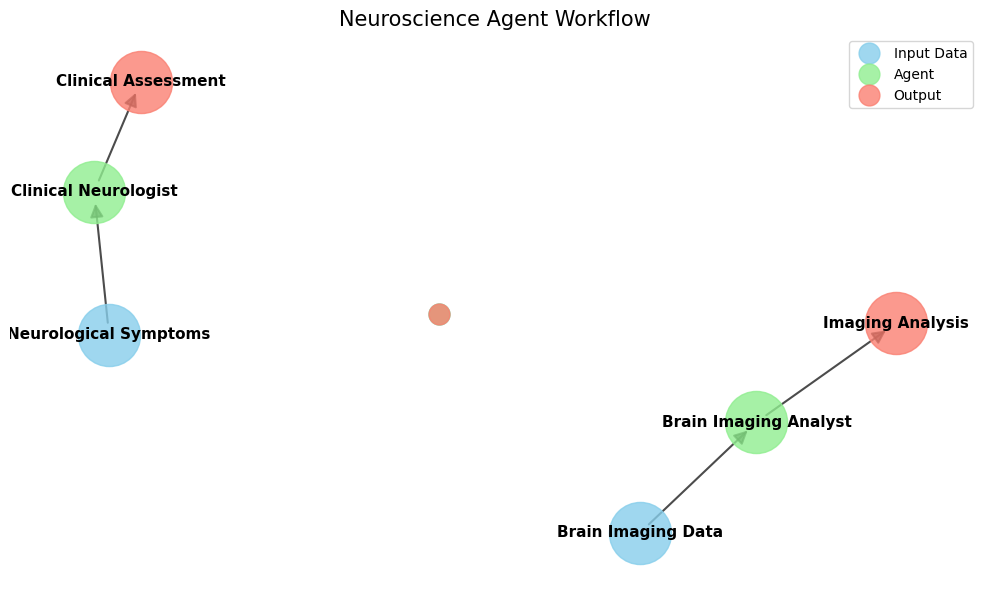

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a simple diagram showing the agent workflow
def visualize_agent_workflow():
    G = nx.DiGraph()
    
    # Add nodes for data sources
    G.add_node("Brain Imaging Data", type="data")
    G.add_node("Neurological Symptoms", type="data")
    
    # Add nodes for agents
    G.add_node("Brain Imaging Analyst", type="agent")
    G.add_node("Clinical Neurologist", type="agent")
    
    # Add nodes for outputs
    G.add_node("Imaging Analysis", type="output")
    G.add_node("Clinical Assessment", type="output")
    
    # Add edges
    G.add_edge("Brain Imaging Data", "Brain Imaging Analyst")
    G.add_edge("Neurological Symptoms", "Clinical Neurologist")
    G.add_edge("Brain Imaging Analyst", "Imaging Analysis")
    G.add_edge("Clinical Neurologist", "Clinical Assessment")
    
    # Set up the plot
    plt.figure(figsize=(10, 6))
    pos = nx.spring_layout(G, seed=42)
    
    # Draw nodes with different colors based on type
    data_nodes = [n for n, d in G.nodes(data=True) if d.get('type') == 'data']
    agent_nodes = [n for n, d in G.nodes(data=True) if d.get('type') == 'agent']
    output_nodes = [n for n, d in G.nodes(data=True) if d.get('type') == 'output']
    
    nx.draw_networkx_nodes(G, pos, nodelist=data_nodes, node_color='skyblue', node_size=2000, alpha=0.8)
    nx.draw_networkx_nodes(G, pos, nodelist=agent_nodes, node_color='lightgreen', node_size=2000, alpha=0.8)
    nx.draw_networkx_nodes(G, pos, nodelist=output_nodes, node_color='salmon', node_size=2000, alpha=0.8)
    
    # Draw edges and labels
    nx.draw_networkx_edges(G, pos, width=1.5, alpha=0.7, arrows=True, arrowsize=20)
    nx.draw_networkx_labels(G, pos, font_size=11, font_weight='bold')
    
    # Add a legend
    plt.plot([0], [0], 'o', markersize=15, color='skyblue', alpha=0.8, label='Input Data')
    plt.plot([0], [0], 'o', markersize=15, color='lightgreen', alpha=0.8, label='Agent')
    plt.plot([0], [0], 'o', markersize=15, color='salmon', alpha=0.8, label='Output')
    plt.legend()
    
    plt.title('Neuroscience Agent Workflow', size=15)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Visualize the workflow
visualize_agent_workflow()

## Future Applications

This simple demonstration shows how AI agents can assist with routine neuroscience tasks. More advanced applications could include:

1. **Automated Literature Analysis** - Agents that scan research papers to extract findings
2. **Experimental Design Assistant** - Agents that help design robust neuroscience experiments
3. **Data Processing Pipeline** - Agents that preprocess neuroimaging data following best practices
4. **Research Collaboration** - Multi-agent systems that facilitate collaboration between specialists

As AI capabilities continue to advance, these systems could significantly accelerate neuroscience research while maintaining scientific rigor.